Fit the CIFAR10 dataset
-----

CIFAR10 small image classification

![](https://kaggle2.blob.core.windows.net/competitions/kaggle/3649/media/cifar-10.png)

Starting with the model you architectured in the previous lab, try to create the best classifer!

Here is the [current leaderboard](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

We'll also have class leaderboard!

-----
Guidelines
-----

Same as MNIST!

__and__ you are restricted from using color (we'll learn about that tomorrow)

In [24]:
reset -fs

In [25]:
import keras

----
Prepare data
----

In [26]:
from keras.datasets import cifar10

In [27]:
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [28]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape  == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape  == (10000, 1)

In [29]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
assert y_train[0][0] == 0
assert y_test[0][0] == 0

----
Take a look at the data
----

In [31]:
from matplotlib import pyplot as plt
from scipy.misc import toimage

%matplotlib inline

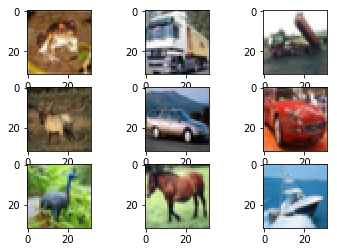

In [32]:
# Create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(toimage(x_train[i]))
    
plt.show()    

In [33]:
img_channels = 3 # The CIFAR10 images are RGB

---
Munge data
----

In [34]:
# Normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_train = x_train / 255.0

x_test = x_test.astype('float32')
x_test = x_test / 255.0

For simplicity, we also convert the images into the grayscale. We use the [Luma coding](https://en.wikipedia.org/wiki/Grayscale#Luma_coding_in_video_systems) that is common in video systems:

[Source](http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/11_NN_Regularization/11_NN_Regularization.html)

In [35]:
import numpy as np

In [36]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

In [37]:
x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)

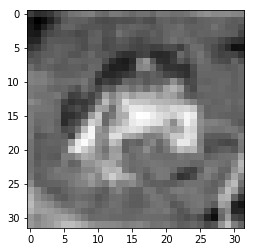

In [38]:
# Create a grid of 3x3 images
img = 0 
plt.imshow(x_train_gray[img, :, :, 0], 
           cmap=plt.get_cmap('gray'), 
           interpolation='none')
    
plt.show()  

In [39]:
img_channels = 1 # now we have only one channel in the images

# However it is more puddle than frog 🐸. Let's how a nonlinearities work!

In [40]:
img_rows, img_cols = 32, 32 # Input image dimensions
image_size = img_rows *  img_cols

In [41]:
# Transform from matrix to vector
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], image_size)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], image_size)

In [42]:
assert x_train_gray.shape == (50000, 1024)
assert x_test_gray.shape == (10000,  1024)

----
Define architecture
-----

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [44]:
# Define model
model = Sequential()

In [45]:
# Define input layer
layer_input = Dense(units=512, 
                    activation='relu', 
                    input_shape=(image_size,))

model.add(layer_input)

In [46]:
# Define another layer
layer_input = Dense(units=512, 
                    activation='relu')

model.add(layer_input)

In [47]:
# Define output layers
layer_output = Dense(units=num_classes,
                     activation='softmax')

model.add(layer_output)

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 792,586.0
Trainable params: 792,586
Non-trainable params: 0.0
_________________________________________________________________


In [49]:
from keras.optimizers import SGD

In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

----
Train model
-----

In [55]:
batch_size = 128
epochs = 5 # Let's limit it to 5

In [56]:
history = model.fit(x_train_gray, 
                    y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=True, 
                    validation_data=(x_test_gray, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 3s - loss: 2.1424 - acc: 0.2291 - val_loss: 2.0690 - val_acc: 0.2654

In [57]:
score = model.evaluate(x_test_gray, 
                       y_test, 
                       verbose=True)

 9312/10000 [==========================>...] - ETA: 0s

In [58]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.93228584099
Test accuracy: 0.3209
